In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
# Camera Capture snippet by Google Colab
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

[Errno 17] File exists: '/gdrive/My Drive/Colab Notebooks/project-checkmate/01_raw_sample_data/'


<IPython.core.display.Javascript object>

Saved to /gdrive/My Drive/Colab Notebooks/project-checkmate/01_raw_sample_data/sample_20.jpg


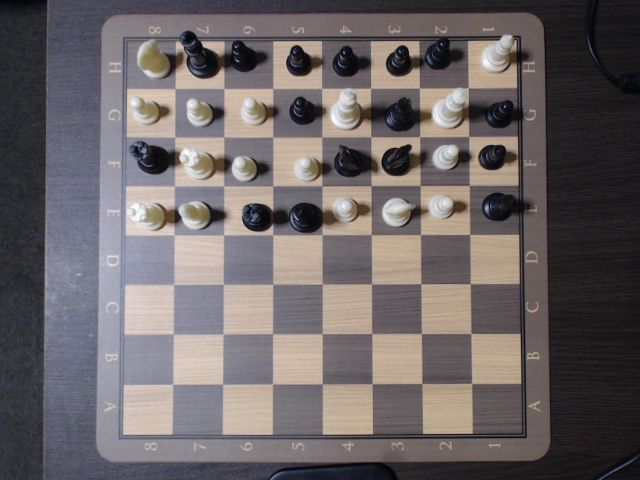

In [3]:
import os

# Take sample data No. xx
sample_num = "20"
raw_sample_name = "sample_" + sample_num + ".jpg"
raw_sample_dir = "/gdrive/My Drive/Colab Notebooks/project-checkmate/01_raw_sample_data/"
try: 
    os.mkdir(raw_sample_dir) 
except OSError as error: 
    print(error)
raw_sample_filename = raw_sample_dir + raw_sample_name

# Camera Capture snippet by Google Colab
from IPython.display import Image
try:
  filename = take_photo(raw_sample_filename)
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

(400, 400, 3)
Displaying Color image:


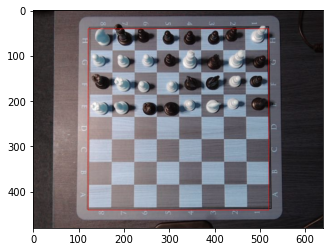

Displaying Color image:


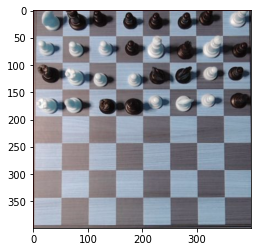

In [4]:
# Configure matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

# Utility class
# Generalized image display function
def display_image(img):
  if img.ndim == 2:
    print("Displaying Grayscale image:")
    plt.imshow(img, cmap='gray')
  else:
    print("Displaying Color image:")
    plt.imshow(img)
  plt.show()

# Visualize captured image
# Ensure Chess board matches the red rectangle guide
cv_img = cv2.imread(raw_sample_filename)
cv_img = cv2.rectangle(cv_img, (121, 41), (520, 440), (255, 0, 0), 1)
print(cv_img[40:440, 120:520].shape)
display_image(cv_img)
display_image(cv_img[41:440, 121:520])